In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import lbg_forecast.tools as tools
import lbg_forecast.hyperparams as hyp
import numpy as np
import matplotlib.pyplot as plt
import fsps
import lbg_forecast.colour_cuts as cuts
import lbg_forecast.tools

In [3]:
bounds = hyp.define_hyperparameter_bounds(

    zred = np.array([0, 3.1, 5.7]),
    logtage = np.array([0, np.log10(0.07), np.log10(0.07)]),
    logzsol = np.array([0, np.log10(0.2), np.log10(0.2)]),
    dust1 = np.array([0, 0, 0]),
    dust2 = np.array([0, 0.599, 0.599]),
    igm_factor = np.array([0, 1, 1]), 
    gas_logu = np.array([0, 0, 0]),
    logfagn = np.array([0, -5, -5]),
    imf1 = np.array([0, 2.35, 2.35]), 
    imf2 = np.array([0, 2.35, 2.35]), 
    imf3 = np.array([0, 2.35, 2.35]), 
    logtau = np.array([0, -7, -7]),
    loga = np.array([0, 3, 3]),
    logb = np.array([0, 3, 3]),
    logmass = np.array([0, 12, 12])

    )

hyperparameters = hyp.sample_hyper_parameters(bounds)
photo, spsparams = tools.simulate_photometry(ngalaxies=1000, hyperparams=hyperparameters, zhistory=False, nebem=False, dust_type=2, imf_type=0, filters='suprimecam')

SPS Parameters Generated
Starting Run 1/3
libraries:  (b'mist', b'miles', b'DL07')


/Users/fpetri/repos/LBGforecast/lbg_forecast/sfh.py:8: RuntimeWarning: overflow encountered in power
  return ((t/tau)**(a) + (t/tau)**(-b))**(-1)


1000
Run 1/3 Complete
Complete


In [4]:
colours = tools.calculate_colours(photo)
print(fsps.find_filter('suprimecam')[1:2]+fsps.find_filter('suprimecam')[3:])

['suprimecam_g', 'suprimecam_r', 'suprimecam_i', 'suprimecam_z']


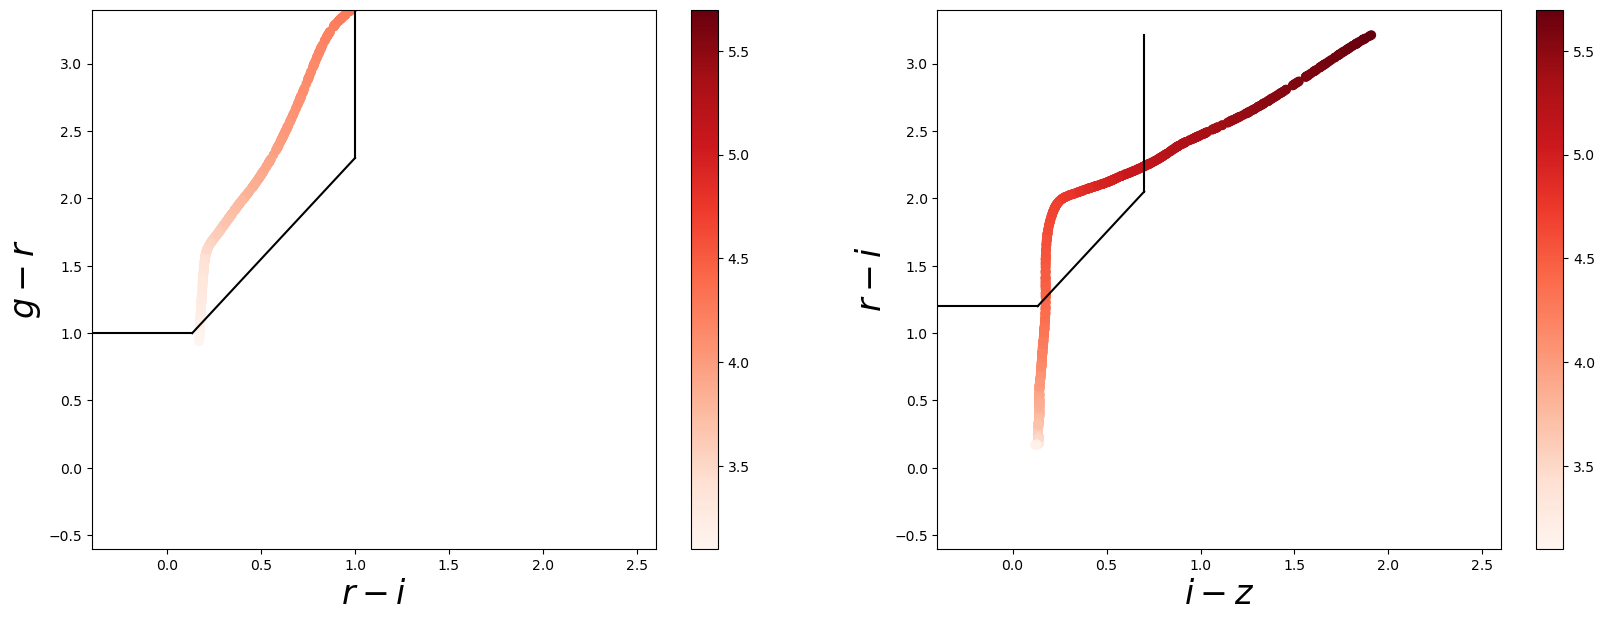

In [5]:
full_colour_map_u, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1 = ax[0]
ax2 = ax[1]

#g colour cuts
x_range1 = np.linspace(-1,(1.0-0.8)/1.5,10)
x_range2 = np.linspace((1.0-0.8)/1.5, 1.0, 10)
y_range1 = np.linspace(2.3, max(colours[:,0]), 10)
y_range2 = np.linspace(1.0, max(colours[:,0]), 10)   

gplot = ax1.scatter(colours[:,1], colours[:,0], c=spsparams[:, 0], cmap="Reds")
ax1.set_xlabel("$r - i$", fontsize=24)
ax1.set_ylabel("$g - r$", fontsize=24)
ax1.set_xlim(-0.4, 2.6)
ax1.set_ylim(-0.6, 3.4)
plt.colorbar(gplot, ax=ax1)

ax1.plot(x_range1, cuts.g_cut1(x_range1), color = 'k')
ax1.plot(cuts.g_cut2(y_range1), y_range1, color = 'k')
ax1.plot(cuts.g_cut3(y_range2), y_range2, color = 'k')
ax1.plot(x_range2, cuts.g_cut4(x_range2), color = 'k')

#r colour cuts
x_range1 = np.linspace(-1,(1.2-1.0)/1.5,10)
x_range2 = np.linspace((1.2-1.0)/1.5, 0.7, 10)
y_range1 = np.linspace(2.05, max(colours[:,1]), 10)
y_range2 = np.linspace(1.2, max(colours[:,1]), 10)    

rplot = ax2.scatter(colours[:,2], colours[:,1], c=spsparams[:, 0], cmap="Reds")
ax2.set_xlabel("$i - z$", fontsize=24)
ax2.set_ylabel("$r - i$", fontsize=24)
ax2.set_xlim(-0.4, 2.6)
ax2.set_ylim(-0.6, 3.4)
plt.colorbar(rplot, ax=ax2)

ax2.plot(x_range1, cuts.r_cut1(x_range1), color = 'k')
ax2.plot(cuts.r_cut2(y_range1), y_range1, color = 'k')
ax2.plot(cuts.r_cut3(y_range2), y_range2, color = 'k')
ax2.plot(x_range2, cuts.r_cut4(x_range2), color = 'k')

Galaxy Age (Gyr): 0.07000000000000002
Age of the universe at given redshift (Gyr): 1.570787780781519
Redshift: 3.982996762062293
Observed Metallicity (Absolute Metallicity): 0.0028400000000000005


(array([4.49043428e-05, 2.83999201e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.840000

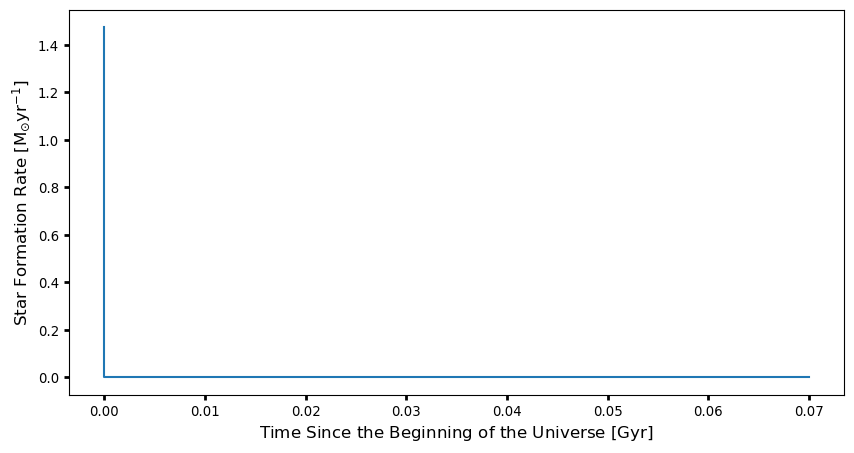

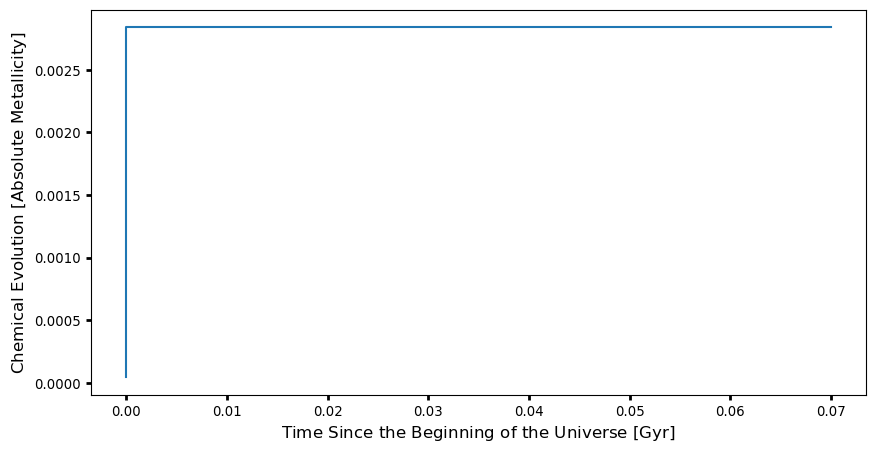

In [6]:
tools.sfh_zhis_diag(spsparams, 0)

In [7]:
a = np.load('generated_photo_final.npy')
b = np.load('generated_photo_neb.npy')
c = np.load('generated_photo_no_neb.npy')
d = np.load('generated_photo_zhis_no_neb.npy')